In [105]:
import pandas as pd
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
import seaborn as sns

In [106]:
train = pd.read_csv("../data/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [107]:
obj_cols = [c for c,dt in train.dtypes.items() if dt=="object"]
train[obj_cols] = train[obj_cols].astype("category")

In [108]:
test = pd.read_csv("../data/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [109]:
obj_cols = [c for c,dt in test.dtypes.items() if dt=="object"]
test[obj_cols] = test[obj_cols].astype("category")

In [110]:
train_y = train["SalePrice"]
train_y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [111]:
train_X = train.drop("SalePrice",axis=1)
train_X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [112]:
X_train, X_val, y_train, y_val = train_test_split(
    train_X, train_y, train_size=0.7, random_state=42)


In [113]:
model = lgbm.LGBMRegressor()

In [114]:
model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val,y_val)],eval_metric="rmse")

[1]	training's rmse: 71373.6	training's l2: 5.09419e+09	valid_1's rmse: 77048.2	valid_1's l2: 5.93642e+09
[2]	training's rmse: 65858.2	training's l2: 4.3373e+09	valid_1's rmse: 71280.2	valid_1's l2: 5.08087e+09
[3]	training's rmse: 60887.3	training's l2: 3.70726e+09	valid_1's rmse: 66359.3	valid_1's l2: 4.40356e+09
[4]	training's rmse: 56546.1	training's l2: 3.19746e+09	valid_1's rmse: 61946.7	valid_1's l2: 3.8374e+09
[5]	training's rmse: 52553.3	training's l2: 2.76185e+09	valid_1's rmse: 57869.7	valid_1's l2: 3.34891e+09
[6]	training's rmse: 49024.3	training's l2: 2.40338e+09	valid_1's rmse: 54428.5	valid_1's l2: 2.96246e+09
[7]	training's rmse: 45769.6	training's l2: 2.09486e+09	valid_1's rmse: 50992.8	valid_1's l2: 2.60026e+09
[8]	training's rmse: 42943.6	training's l2: 1.84415e+09	valid_1's rmse: 48161	valid_1's l2: 2.31948e+09
[9]	training's rmse: 40366.7	training's l2: 1.62947e+09	valid_1's rmse: 45526.5	valid_1's l2: 2.07266e+09
[10]	training's rmse: 38221	training's l2: 1.46084

/mnt/f/Kaggle/Housing-Prices/.venv/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/mnt/f/Kaggle/Housing-Prices/.venv/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


LGBMRegressor()

In [115]:
eval_results = model.evals_result_
losses = pd.DataFrame()
losses["training"] = eval_results["training"]['rmse']
losses["validation"] = eval_results["valid_1"]['rmse']
losses.head()

,training,validation
0,71373.583756,77048.174425
1,65858.194084,71280.213222
2,60887.275781,66359.322282
3,56546.119065,61946.744300
4,52553.266638,57869.732878


<AxesSubplot:ylabel='training'>

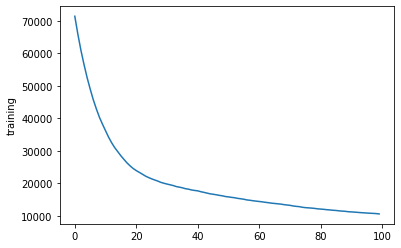

In [119]:
sns.lineplot(data=losses,x=losses.index,y="training",label="training")
sns.lineplot(data=losses,x=losses.index,y="validation",label="validation")

In [117]:
output = pd.DataFrame()
output["Id"] = test["Id"]
output["SalePrice"] = model.predict(test)
output.head()

,Id,SalePrice
0,1461,126935.446763
1,1462,157537.415112
2,1463,194205.564363
3,1464,195565.282090
4,1465,179674.674863


In [118]:
output.to_csv("submission.csv",index=None)